In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
def load_data(path):
    with np.load(path) as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']
        return (x_train, y_train), (x_test, y_test)

In [3]:
# we will start simple with a single fully-connected neural layer as encoder and decoder
# this is the siez of our encoded representations
ENCODING_DIM = 32

# input placeholder
input_img = tf.keras.layers.Input(shape=(784,))

# this is the encoded representation of the input
encoded = tf.keras.layers.Dense(ENCODING_DIM, activation='relu')(input_img)

# this is the loss reconstruction of the input
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its recommendation
autoencoder = tf.keras.models.Model(input_img, decoded)


In [4]:
encoder = tf.keras.models.Model(input_img, encoded)

In [5]:
encoded_input = tf.keras.layers.Input(shape=(ENCODING_DIM,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = tf.keras.models.Model(encoded_input, decoder_layer(encoded_input))


In [6]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


In [21]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [22]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [23]:
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 6s 20ms/step - loss: 0.6952 - val_loss: 0.6951
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.6950 - val_loss: 0.6949
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.6948 - val_loss: 0.6947
Epoch 4/50
235/235 [==============================] - 2s 10ms/step - loss: 0.6946 - val_loss: 0.6946
Epoch 5/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6944 - val_loss: 0.6944
Epoch 6/50
235/235 [==============================] - 3s 14ms/step - loss: 0.6943 - val_loss: 0.6942
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.6941 - val_loss: 0.6941
Epoch 8/50
235/235 [==============================] - 2s 10ms/step - loss: 0.6939 - val_loss: 0.6939
Epoch 9/50
235/235 [==============================] - 3s 11ms/step - loss: 0.6938 - val_loss: 0.6937
Epoch 10/50
235/235 [==============================] - 3s 14ms/step - loss: 0.6936 - val_lo

In [24]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 1ms/step


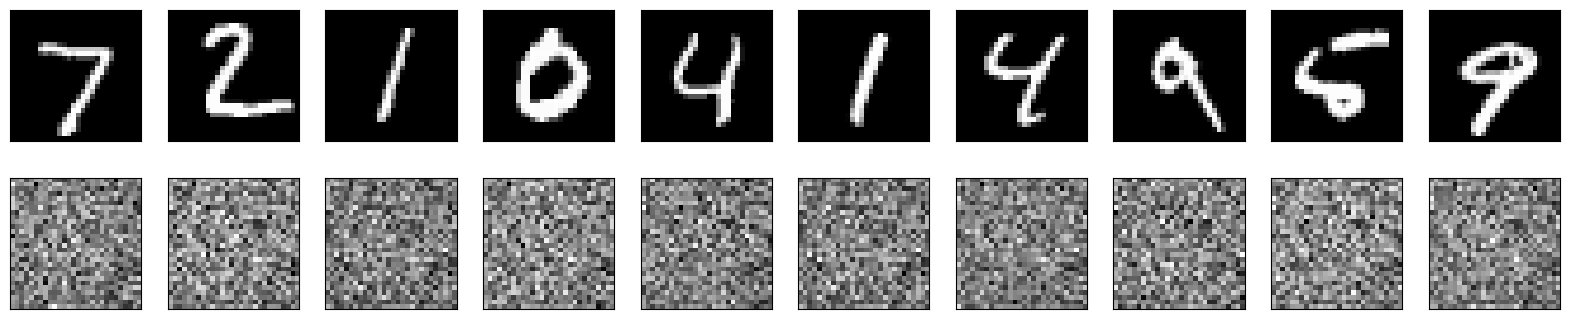

In [26]:
n = 10 # how many images we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


Adding a sparsity constraint on the encoded representations
way to constain the representation to be compact is to add a sparsity constraint on the activity of the hiddne representations, so fewer units would "fire" at a given time. We can do this by adding activity_regularizer to our Dense layer.

In [27]:
ENCODING_DIM = 32

input_img = tf.keras.layers.Input(shape=(784,))

# add a dense layer with L1 activity regularizer
encoded = tf.keras.layers.Dense(ENCODING_DIM, activation='relu', activity_regularizer=tf.keras.regularizers.l1(10e-5))(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# now let's train this for 100 epochs (with added regularization, the model is less likely to overfit and can be trained longer). The model ends with a train loss of 0.11 and test loss of 0.10. The difference is mostly due to the regularization term being added to the loss during training
autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 4s 15ms/step - loss: 0.6947 - val_loss: 0.6946
Epoch 2/100
235/235 [==============================] - 2s 9ms/step - loss: 0.6945 - val_loss: 0.6944
Epoch 3/100
235/235 [==============================] - 2s 10ms/step - loss: 0.6943 - val_loss: 0.6942
Epoch 4/100
235/235 [==============================] - 3s 12ms/step - loss: 0.6941 - val_loss: 0.6940
Epoch 5/100
235/235 [==============================] - 2s 10ms/step - loss: 0.6939 - val_loss: 0.6939
Epoch 6/100
235/235 [==============================] - 3s 14ms/step - loss: 0.6938 - val_loss: 0.6937
Epoch 7/100
235/235 [==============================] - 2s 11ms/step - loss: 0.6936 - val_loss: 0.6935
Epoch 8/100
235/235 [==============================] - 3s 11ms/step - loss: 0.6934 - val_loss: 0.6933
Epoch 9/100
235/235 [==============================] - 3s 11ms/step - loss: 0.6932 - val_loss: 0.6931
Epoch 10/100
235/235 [==============================] - 2s 10ms/step - loss: 0.6931